In [76]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["font.size"] = 16

In [77]:
routes  = pd.read_csv("../../../../data/mmt_gtfs/routes/all_routes.csv")
trips   = pd.read_csv("../../../../data/mmt_gtfs/trips.csv")  # 11,640 different trips
colored = gpd.read_file("../../../../data/bus_route_stop_info/routes_colored-shp")

In [78]:
set(colored["route_shor"]).difference(set(trips["route_short_name"]))

set(colored["route_shor"])

headsigns = set(routes["stop_headsign"])

In [79]:
set(colored["route_shor"]).difference(set(trips["route_short_name"]))

{1, 3, 14, 19, 25, 28, 29, 34, 35, 37, 38, 47, 56, 57, 58, 71}

In [80]:
data = pd.read_csv("../../../../data/FTA/madison_data.csv").set_index("date").loc["JAN16":, :]
data.round(2).head()

,upt_madison,upt_wisc_state,upt_us,vrm_madison,vrm_wisc_state,vrm_us,vrh_madison,vrh_wisc_state,vrh_us,voms_madison,voms_wisc_state,voms_us
date,,,,,,,,,,,,
JAN16,1126100.0,516328.57,774595.62,405481.0,245946.00,302806.94,32325.0,18998.10,25664.19,182.0,86.00,96.86
FEB16,1398489.0,556919.95,817721.05,421619.0,249653.76,303840.85,33872.0,19195.24,25725.67,182.0,86.38,96.95
MAR16,1255876.0,568960.62,879899.31,446775.0,267340.24,328309.69,35847.0,20598.57,27889.52,182.0,86.43,97.00
APR16,1257823.0,556776.43,843313.15,428532.0,253954.10,313646.48,34412.0,19674.24,26645.36,182.0,86.29,97.04
MAY16,1022718.0,523784.90,831471.20,425090.0,252507.90,315200.21,33898.0,19540.67,26711.97,182.0,84.95,96.97


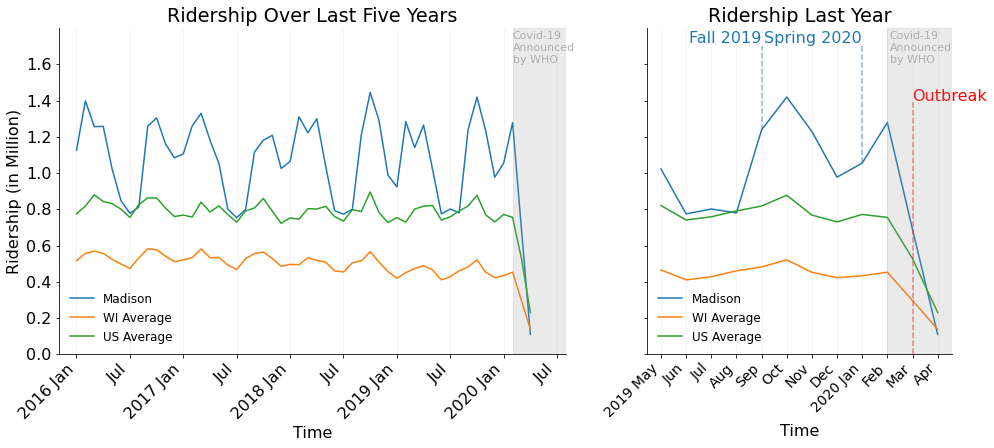

In [81]:
# xticks = np.arange(0, 550, 100)

fig, axes = plt.subplots(ncols=2, figsize=(16, 6), sharey=True, gridspec_kw={'width_ratios': [5, 3]})
a1, a2 = (axes[0], axes[1])


# -------------------------------- a1 --------------------------------
a1.plot(data.index, data["upt_madison"], label="Madison")
a1.plot(data.loc[:"APR20", :].index, data.loc[:"APR20", :]["upt_wisc_state"], label="WI Average")
a1.plot(data.loc[:"APR20", :].index, data.loc[:"APR20", :]["upt_us"], label="US Average")

a1.set_xlim((-2, 55))
a1.set_xticks(np.arange(0, 55, 6))
a1.set_xticklabels(["2016 Jan", "Jul", "2017 Jan", "Jul",
                    "2018 Jan", "Jul", "2019 Jan", "Jul",
                    "2020 Jan", "Jul"], rotation=45, ha="right")

a1.set_ylim((0, 1.8*1e6))
a1.set_yticks(np.arange(0, 1.8, .2) * int(1e6))
a1.set_yticklabels(list(map(str, np.round(np.arange(0, 1.8, .2), 2))))

a1.text(49, a1.get_ylim()[1] - 190000, "Covid-19\nAnnounced\nby WHO", ha="left", color="0.7", size=11)

pandemic = plt.Rectangle((49, a1.get_ylim()[0]), 100, a1.get_ylim()[1],
                     color="0.6", zorder=10, alpha=0.2, transform=a1.transData)
a1.add_artist(pandemic)

a1.set_title("Ridership Over Last Five Years")
a1.set_ylabel("Ridership (in Million)")
a1.set_xlabel("Time")
a1.legend(loc="lower left", frameon=False, fontsize=12)
a1.grid(axis='x', color='0.95')
a1.spines['right'].set_visible(False)
a1.spines['top'].set_visible(False)

# -------------------------------- a2 --------------------------------
a2.plot(data.loc["MAY19":, :].index, data.loc["MAY19":, :]["upt_madison"], label="Madison")
a2.plot(data.loc["MAY19":"APR20", :].index, data.loc["MAY19":"APR20", :]["upt_wisc_state"], label="WI Average")
a2.plot(data.loc["MAY19":"APR20", :].index, data.loc["MAY19":"APR20", :]["upt_us"], label="US Average")

# a2.set_xlim((-1, 13))
a2.set_xticks(np.arange(0, 12, 1))
a2.set_xticklabels(["2019 May", "Jun", "Jul", "Aug", "Sep",
                    "Oct", "Nov", "Dec", "2020 Jan", "Feb",
                    "Mar", "Apr"], rotation=45, ha="right", size=14)

f19 = plt.Line2D((4, 4), (data.loc["SEP19", "upt_madison"], a2.get_ylim()[1] - 100000), color="#1f77b4", linestyle="--", alpha=0.5)
a2.text(4, a2.get_ylim()[1] - 100000, "Fall 2019", va="bottom", ha="right", color="#1f77b4")
a2.add_artist(f19)

s20 = plt.Line2D((8, 8), (data.loc["JAN20", "upt_madison"], a2.get_ylim()[1] - 100000), color="#1f77b4", linestyle="--", alpha=0.5)
a2.text(8, a2.get_ylim()[1] - 100000, "Spring 2020", va="bottom", ha="right", color="#1f77b4")
a2.add_artist(s20)

covid19 = plt.Line2D((10, 10), (a2.get_ylim()[0], a2.get_ylim()[1] - 400000), color="r", linestyle="--", alpha=0.5)
a2.text(10, a2.get_ylim()[1] - 400000, "Outbreak", ha="left", color="r")
a2.add_artist(covid19)

pandemic = plt.Rectangle((9, a2.get_ylim()[0]), 100, a2.get_ylim()[1],
                     color="0.6", zorder=10, alpha=0.2, transform=a2.transData)
a2.text(9.1, a2.get_ylim()[1] - 190000, "Covid-19\nAnnounced\nby WHO", ha="left", color="0.7", size=11)
a2.add_artist(pandemic)


a2.set_title("Ridership Last Year")
a2.set_xlabel("Time")
a2.grid(axis='x', color='0.95')
a2.legend(frameon=False, fontsize=12, loc="lower left")
a2.spines['right'].set_visible(False)
a2.spines['top'].set_visible(False)

# plt.savefig("1019-1-update.png", dpi=300, bbox_inches="tight")


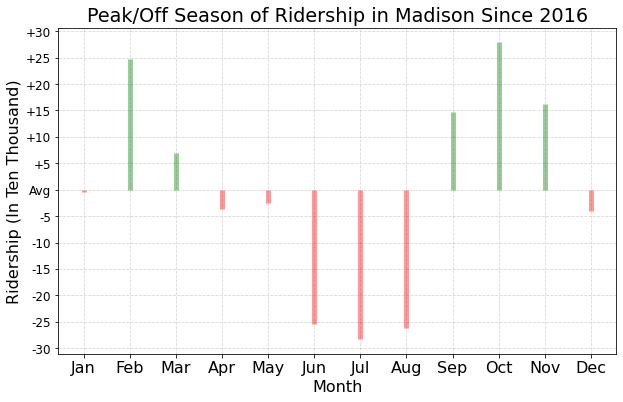

In [82]:
# 2016 - 2019
data = pd.read_csv("../../../../data/FTA/madison_data.csv").set_index("date").loc["JAN16":, :]

madison = pd.DataFrame({
    "Jan": data[data.index.str.contains("JAN")]["upt_madison"].reset_index(drop=True),
    "Feb": data[data.index.str.contains("FEB")]["upt_madison"].reset_index(drop=True),
    "Mar": data[data.index.str.contains("MAR")]["upt_madison"].reset_index(drop=True),
    "Apr": data[data.index.str.contains("APR")]["upt_madison"].reset_index(drop=True),
    "May": data[data.index.str.contains("MAY")]["upt_madison"].reset_index(drop=True),
    "Jun": data[data.index.str.contains("JUN")]["upt_madison"].reset_index(drop=True),
    "Jul": data[data.index.str.contains("JUL")]["upt_madison"].reset_index(drop=True),
    "Aug": data[data.index.str.contains("AUG")]["upt_madison"].reset_index(drop=True),
    "Sep": data[data.index.str.contains("SEP")]["upt_madison"].reset_index(drop=True),
    "Oct": data[data.index.str.contains("OCT")]["upt_madison"].reset_index(drop=True),
    "Nov": data[data.index.str.contains("NOV")]["upt_madison"].reset_index(drop=True),
    "Dec": data[data.index.str.contains("DEC")]["upt_madison"].reset_index(drop=True)
})
wisc = pd.DataFrame({
    "Jan":    data[data.index.str.contains("JAN")]["upt_wisc_state"].reset_index(drop=True),
    "Feb":    data[data.index.str.contains("FEB")]["upt_wisc_state"].reset_index(drop=True),
    "Mar":    data[data.index.str.contains("MAR")]["upt_wisc_state"].reset_index(drop=True),
    "Apr":    data[data.index.str.contains("APR")]["upt_wisc_state"].reset_index(drop=True),
    "May":    data[data.index.str.contains("MAY")]["upt_wisc_state"].reset_index(drop=True),
    "Jun":    data[data.index.str.contains("JUN")]["upt_wisc_state"].reset_index(drop=True),
    "Jul":    data[data.index.str.contains("JUL")]["upt_wisc_state"].reset_index(drop=True),
    "Aug":    data[data.index.str.contains("AUG")]["upt_wisc_state"].reset_index(drop=True),
    "Sep":    data[data.index.str.contains("SEP")]["upt_wisc_state"].reset_index(drop=True),
    "Oct":    data[data.index.str.contains("OCT")]["upt_wisc_state"].reset_index(drop=True),
    "Nov":    data[data.index.str.contains("NOV")]["upt_wisc_state"].reset_index(drop=True),
    "Dec":    data[data.index.str.contains("DEC")]["upt_wisc_state"].reset_index(drop=True)
})
us = pd.DataFrame({
    "Jan":      data[data.index.str.contains("JAN")]["upt_us"].reset_index(drop=True),
    "Feb":      data[data.index.str.contains("FEB")]["upt_us"].reset_index(drop=True),
    "Mar":      data[data.index.str.contains("MAR")]["upt_us"].reset_index(drop=True),
    "Apr":      data[data.index.str.contains("APR")]["upt_us"].reset_index(drop=True),
    "May":      data[data.index.str.contains("MAY")]["upt_us"].reset_index(drop=True),
    "Jun":      data[data.index.str.contains("JUN")]["upt_us"].reset_index(drop=True),
    "Jul":      data[data.index.str.contains("JUL")]["upt_us"].reset_index(drop=True),
    "Aug":      data[data.index.str.contains("AUG")]["upt_us"].reset_index(drop=True),
    "Sep":      data[data.index.str.contains("SEP")]["upt_us"].reset_index(drop=True),
    "Oct":      data[data.index.str.contains("OCT")]["upt_us"].reset_index(drop=True),
    "Nov":      data[data.index.str.contains("NOV")]["upt_us"].reset_index(drop=True),
    "Dec":      data[data.index.str.contains("DEC")]["upt_us"].reset_index(drop=True)
})

df = madison.copy()
avg = df.mean().mean()
df_std = df - avg
temp = pd.DataFrame({"std": df_std.mean()})
temp['colors'] = ['red' if x < 0 else 'green' for x in temp.values]
plt.figure(figsize=(10,6))
plt.vlines(x=temp.index, ymin=0, ymax=temp["std"], color=temp.colors, alpha=0.4, linewidth=5)


# plt.gca().set(xlabel='$Model$', ylabel='$Mileage$')
yticks = list(map(str, range(-30, 35, 5)))
yticks = ["+" + t if int(t) > 0 else t for t in yticks]
yticks[yticks.index("0")] = "Avg"
plt.yticks(np.arange(-30, 35, 5) * 10000, yticks, fontsize=12)
plt.title('Peak/Off Season of Ridership in Madison Since 2016')
plt.ylabel("Ridership (In Ten Thousand)")
plt.xlabel("Month")

# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
plt.grid(linestyle='--', alpha=0.5)

# plt.savefig("1019-2.png", dpi=300)

plt.show()


In [83]:
madison.loc[:3, :]["Jul"].mean() / madison.loc[:3, :]["Jan"].mean()
# jan / jul = 0.7360127484208449

0.7360127484208449

In [84]:
wisc.loc[:3, :]["Jul"].mean() / wisc.loc[:3, :]["Jan"].mean()

0.933362553171022

In [85]:
madison

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1126100.0,1398489.0,1255876.0,1257823.0,1022718.0,847429.0,777758.0,811545.0,1257821.0,1304654.0,1161149.0,1083929.0
1,1105684.0,1260263.0,1330069.0,1181920.0,1053067.0,801510.0,753805.0,799340.0,1116085.0,1181518.0,1208373.0,1025443.0
2,1063612.0,1310028.0,1222362.0,1300014.0,1038121.0,792640.0,772623.0,800997.0,1208904.0,1445019.0,1288499.0,987879.0
3,924107.0,1284120.0,1140434.0,1264676.0,1022403.0,774681.0,801422.0,780326.0,1238405.0,1419502.0,1229313.0,977125.0
4,1055049.0,1278838.0,689277.0,110054.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
affected = wisc.loc[4, "Jan":"Apr"].iloc[3] / wisc.loc[4, "Jan":"Apr"].iloc[1]
1 - affected

0.6956072018311193

In [105]:
affected = us.loc[4, "Jan":"Apr"].iloc[3] / us.loc[4, "Jan":"Apr"].iloc[1]
1 - affected

0.6951323076699142

In [88]:
wisc

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,516328.571429,556919.952381,568960.619048,556776.428571,523784.904762,497886.571429,473695.428571,531540.428571,581912.333333,576879.952381,541404.428571,510970.904762
1,521241.950000,532621.650000,581566.000000,532845.000000,534260.900000,492113.350000,467777.250000,527492.200000,555587.350000,563930.850000,528514.700000,485182.600000
2,495992.450000,494139.100000,532405.250000,518000.100000,507908.300000,460104.750000,454110.200000,505067.500000,514963.850000,565978.050000,508849.250000,456094.050000
3,419573.047619,450158.571429,473306.095238,488549.809524,465489.857143,410372.285714,427401.142857,460663.904762,481804.047619,520913.142857,452252.047619,422611.428571
4,433184.000000,452868.952381,296158.904762,137850.047619,150387.750000,153063.050000,179036.250000,172190.450000,NaN,NaN,NaN,NaN


In [89]:
us

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,774595.622363,817721.050633,879899.308017,843313.145570,831471.196617,800554.858351,755290.809322,826236.566879,862843.921610,862609.281780,806936.549894,760185.031847
1,767916.901919,757213.503198,839978.185106,784706.419149,818798.578723,771266.895522,729004.070213,790957.639066,807301.842553,859906.099788,790159.462845,722363.755839
2,752448.961456,745613.472103,803530.873391,801350.918455,816297.133047,760129.465665,735376.295503,797900.072805,787515.804721,895392.991398,781144.853763,727095.192719
3,754530.438445,729197.526998,801430.574514,817031.336933,820964.833693,740892.769397,758667.015217,790830.167391,818103.393478,877488.809111,767935.320261,730487.964835
4,771500.501094,755357.258850,527752.328918,230284.024390,273652.404444,337462.362222,405972.985816,433300.909091,NaN,NaN,NaN,NaN


In [104]:
affected = madison.loc[4, "Jan":"Apr"].iloc[3] / madison.loc[4, "Jan":"Apr"].iloc[1]
1 - affected

0.9139421881426733

In [108]:

1278838 - (1278838 * 0.9139421881426733)

110054.0